# The Relationship Between Earning Reports and Stock Price Movements in the Tech Industry


The stock market is a complex and dynamic entity, influenced by a multitude of factors such as economic trends, political events, and market sentiment. In this sea of information and variables, investors and stakeholders are constantly searching for clues to understand how a company's stock price may move in response to different events.

One such factor that we believed to impact stock prices is a company's earnings report. It's no surprise that the release of a company's earnings report can have a significant impact on the stock price movement of that company since it disclose the earnings that company generate up to the announcement date.

In this study, we aim to shed light on the relationship between earnings reports and stock prices in the tech industry by conducting a data analysis using Python. Our research question is simple: "Does earning reports impact the stock price movement of the company, more specifically in the tech industry?"

The results of this analysis will provide valuable insights into the impact of earnings reports on stock prices in the tech industry and help investors and stakeholders make informed decisions.


## 1. Problems Statement and Scope

### Problem Statement:

The stock market is a complex entity influenced by numerous factors, and investors and stakeholders are constantly searching for ways to understand and predict stock price movements. One such factor that is believed to impact stock prices is a company's earnings report, specifically the Earnings per Share (EPS) metric. Despite widespread belief in the impact of earnings reports on stock prices, there is limited empirical evidence to support this relationship, particularly in the technology industry.

### Scope of the Study:

This study aims to examine the relationship between earnings reports and stock prices in the technology industry. The scope of the study is limited to the analysis of publicly traded tech companies of S&P500 pool in the U.S and the examination of stock price movements in response to the release of quarterly earnings reports. The study will use Python to conduct data analysis and will focus on the filing date of the earnings report as a key indicator of the companies' stock price movement in the next 7 calendar days.

## 2. Resources

We will be utilizing data extracted from the well-known financial data provider, Yahoo Finance for the information of the daily stock price, as well as a dataset available on Kaggle regarding to the earnings report of the U.S tech companies.

'Timeline: from 2010-01-01 to 2020-12-31
'Number of Industry Sectors: 1
'Companies: 76
'Sampling Pool: S&P 500

   ### 2.1. Data collection and treatment

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime

In [1]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

# Get the data for this tickers from yahoo finance
sp500_daily_stock = yf.download(tickers.Symbol.to_list(),'2010-1-1','2020-12-31', auto_adjust=True)['Close']

sp500_daily_stock

  Symbol     Security SEC filings             GICS Sector  \
0    MMM           3M     reports             Industrials   
1    AOS  A. O. Smith     reports             Industrials   
2    ABT       Abbott     reports             Health Care   
3   ABBV       AbbVie     reports             Health Care   
4    ACN    Accenture     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1976-08-09   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1964-03-31   
3                 Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  
[*********************100%******

A        AAL         AAP        AAPL       ABBV  \
Date                                                                   
2010-01-04   20.434929   4.496876   37.163254    6.515212        NaN   
2010-01-05   20.212959   5.005956   36.942387    6.526477        NaN   
2010-01-06   20.141132   4.798553   37.264507    6.422666        NaN   
2010-01-07   20.115025   4.939965   37.255299    6.410791        NaN   
2010-01-08   20.108498   4.845691   37.402557    6.453413        NaN   
...                ...        ...         ...         ...        ...   
2020-12-23  116.477890  15.890000  151.386841  129.406570  93.963943   
2020-12-24  116.487816  15.660000  152.707901  130.404572  93.945755   
2020-12-28  117.004181  16.059999  150.921158  135.068558  94.118622   
2020-12-29  116.408386  15.860000  148.915863  133.270187  95.255867   
2020-12-30  116.567268  16.150000  149.837738  132.133804  95.774445   

                  ABC         ABT       ACGL         ACN        ADBE  ...  \
Date                                                                  ...   
2010-01-04  21.899002   19.433035   7.994444   32.970871   37.090000  ...   
2010-01-05  21.742762   19.276031   7.967778   33.174648   37.700001  ...   
2010-01-06  21.537176   19.383080   7.933333   33.527321   37.619999  ...   
2010-01-07  21.191797   19.543652   7.886667   33.495968   36.889999  ...   
2010-01-08  21.422054   19.643562   7.871111   33.362751   36.689999  ...   
...               ...         ...        ...         ...         ...  ...   
2020-12-23  94.588081  103.599045  35.080002  253.639160  496.910004  ...   
2020-12-24  94.325439  104.466789  34.860001  253.501236  499.859985  ...   
2020-12-28  94.160080  103.926865  35.330002  255.846085  498.950012  ...   
2020-12-29  94.471352  104.447510  35.299999  253.954483  502.109985  ...   
2020-12-30  94.315720  104.553558  35.580002  253.737717  497.450012  ...   

                  WYNN        XEL        XOM       XRAY        XYL  \
Date                                                                 
2010-01-04   41.963718  13.504497  41.998302  32.242283        NaN   
2010-01-05   44.515919  13.344333  42.162304  31.858976        NaN   
2010-01-06   43.932007  13.369964  42.526707  32.068874        NaN   
2010-01-07   44.870220  13.312306  42.393085  32.488682        NaN   
2010-01-08   44.548725  13.318714  42.223022  32.488682        NaN   
...                ...        ...        ...        ...        ...   
2020-12-23  115.300003  60.855057  37.848843  50.513954  97.518700   
2020-12-24  114.389999  61.157871  37.694798  50.719486  98.027161   
2020-12-28  115.470001  61.810802  37.821659  51.199081  98.144508   
2020-12-29  114.309998  61.905422  37.395775  50.161591  97.303589   
2020-12-30  113.400002  62.123074  37.694798  50.367134  98.545410   

                   YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                   
2010-01-04   19.616253   53.094769   28.670000  11.128119         NaN  
2010-01-05   19.549168   54.775547   28.620001  11.520484         NaN  
2010-01-06   19.409407   54.757862   28.400000  12.522265         NaN  
2010-01-07   19.403820   56.014008   27.690001  13.924757         NaN  
2010-01-08   19.409407   54.837479   27.600000  13.699360         NaN  
...                ...         ...         ...        ...         ...  
2020-12-23  103.048706  142.290375  379.739990  41.290283  157.446213  
2020-12-24  103.772438  142.778259  376.890015  41.128960  158.303131  
2020-12-28  105.933952  142.433868  382.589996  41.147934  159.947998  
2020-12-29  105.615517  145.839493  378.040009  40.588039  160.667007  
2020-12-30  105.673409  145.619476  383.750000  41.015076  161.799713  

[2768 rows x 503 columns]

In [2]:
#Read the stock tickers and sector info that make up S&P500
tickers = pd.read_html(
'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

#Filter only Information Technology companies
info_tech_tickers = tickers[tickers['GICS Sector'] == 'Information Technology']

#Get the data for the filtered tickers from yahoo finance
tech_daily_stock = yf.download(info_tech_tickers['Symbol'].to_list(),'2010-1-1','2020-12-31', auto_adjust=True)['Close']

tech_daily_stock

[*********************100%***********************]  76 of 76 completed


AAPL         ACN        ADBE         ADI         ADP  \
Date                                                                     
2010-01-04    6.572423   32.970871   37.090000   23.694084   28.267551   
2010-01-05    6.583786   33.174648   37.700001   23.656675   28.115761   
2010-01-06    6.479064   33.527321   37.619999   23.611784   28.049759   
2010-01-07    6.467087   33.495968   36.889999   23.424749   28.036560   
2010-01-08    6.510081   33.362751   36.689999   23.559416   27.996952   
...                ...         ...         ...         ...         ...   
2020-12-23  130.542862  253.639160  496.910004  142.008636  173.477264   
2020-12-24  131.549637  253.501236  499.859985  143.248062  174.833862   
2020-12-28  136.254608  255.846085  498.950012  143.456284  174.883392   
2020-12-29  134.440399  253.954483  502.109985  142.444916  173.160385   
2020-12-30  133.294067  253.737717  497.450012  144.943588  172.110748   

                  ADSK        AKAM       AMAT        AMD       ANET  ...  \
Date                                                                 ...   
2010-01-04   25.670000   25.920000  11.440813   9.700000        NaN  ...   
2010-01-05   25.280001   26.690001  11.352810   9.710000        NaN  ...   
2010-01-06   25.340000   26.469999  11.328804   9.570000        NaN  ...   
2010-01-07   25.480000   26.480000  11.208794   9.470000        NaN  ...   
2010-01-08   26.260000   26.480000  11.640829   9.430000        NaN  ...   
...                ...         ...        ...        ...        ...  ...   
2020-12-23  300.179993  107.059998  83.724426  91.550003  71.622498  ...   
2020-12-24  301.390015  107.459999  85.019699  91.809998  72.209999  ...   
2020-12-28  299.649994  107.279999  84.561378  91.599998  72.735001  ...   
2020-12-29  298.109985  106.709999  83.963554  90.620003  71.875000  ...   
2020-12-30  299.410004  104.650002  86.663704  92.290001  72.239998  ...   

                   TDY         TEL         TER       TRMB         TXN  \
Date                                                                    
2010-01-04   39.500000   19.474321   10.278949  12.825000   19.275860   
2010-01-05   39.299999   19.186447   10.316463  12.760000   19.164692   
2010-01-06   39.369999   19.575470   10.222674  12.725000   19.023890   
2010-01-07   39.880001   19.209787   10.278949  12.745000   19.083174   
2010-01-08   40.299999   19.450979   10.391492  12.845000   19.520420   
...                ...         ...         ...        ...         ...   
2020-12-23  385.799988  117.610023  117.084061  66.580002  158.248810   
2020-12-24  383.480011  117.777122  118.701622  66.650002  158.897629   
2020-12-28  386.799988  117.875427  117.553352  66.430000  158.730515   
2020-12-29  384.910004  116.135612  117.024139  65.769997  158.445435   
2020-12-30  391.100006  117.718155  120.109505  66.330002  159.939636   

                   TYL           V        VRSN        WDC        ZBRA  
Date                                                                   
2010-01-04   20.299999   20.172447   21.007998  35.536190   28.670000  
2010-01-05   20.780001   19.941280   21.228777  36.478378   28.620001  
2010-01-06   20.770000   19.673510   20.999506  36.509796   28.400000  
2010-01-07   20.500000   19.856611   20.710794  35.795292   27.690001  
2010-01-08   20.740000   19.911530   20.872135  35.975883   27.600000  
...                ...         ...         ...        ...         ...  
2020-12-23  432.989990  203.715179  214.009995  49.930000  379.739990  
2020-12-24  434.260010  207.088928  214.589996  49.919998  376.890015  
2020-12-28  431.929993  210.988586  216.800003  50.060001  382.589996  
2020-12-29  429.369995  212.715149  215.630005  48.290001  378.040009  
2020-12-30  428.929993  216.674362  214.500000  49.529999  383.750000  

[2768 rows x 76 columns]

In [4]:
print(tech_daily_stock.columns)

Index(['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET', 'ANSS', 'APH', 'AVGO', 'BR', 'CDAY', 'CDNS', 'CDW', 'CRM',
       'CSCO', 'CTSH', 'DXC', 'ENPH', 'EPAM', 'FFIV', 'FIS', 'FISV', 'FLT',
       'FSLR', 'FTNT', 'GEN', 'GLW', 'GPN', 'HPE', 'HPQ', 'IBM', 'INTC',
       'INTU', 'IT', 'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MCHP',
       'MPWR', 'MSFT', 'MSI', 'MU', 'NOW', 'NTAP', 'NVDA', 'NXPI', 'ON',
       'ORCL', 'PAYC', 'PAYX', 'PTC', 'PYPL', 'QCOM', 'QRVO', 'ROP', 'SEDG',
       'SNPS', 'STX', 'SWKS', 'TDY', 'TEL', 'TER', 'TRMB', 'TXN', 'TYL', 'V',
       'VRSN', 'WDC', 'ZBRA'],
      dtype='object')


In [13]:
# Load your data into a dataframe named 'df'
df = pd.read_excel("tech_daily_stock.xlsx")

# Melt the dataframe to reshape it
melted_df = df.melt(id_vars='Date', var_name='symbol', value_name='close')

# Drop any rows with missing values
melted_df.dropna(inplace=True)

transformed_tech_daily_stock = melted_df.groupby(['Date', 'symbol'], as_index=False).mean()

# Sort by symbol
transformed_tech_daily_stock.sort_values(by='symbol', inplace=True, ascending=True)

transformed_tech_daily_stock

Date symbol       close
0      2010-01-04   AAPL    6.572423
132201 2017-08-18   AAPL   37.635151
132276 2017-08-21   AAPL   37.565865
132351 2017-08-22   AAPL   38.179970
132426 2017-08-23   AAPL   38.227753
...           ...    ...         ...
35351  2012-03-20   ZBRA   40.619999
124100 2017-03-15   ZBRA   90.889999
59980  2013-09-06   ZBRA   45.779999
193588 2020-11-04   ZBRA  329.179993
196476 2020-12-30   ZBRA  383.750000

[196477 rows x 3 columns]

In [14]:
earnings_report = pd.read_csv('earnings_latest.csv')

earnings_report

symbol        date      qtr  eps_est   eps release_time
0           A  2009-05-14  04/2009      NaN   NaN         post
1           A  2009-08-17  07/2009      NaN   NaN         post
2           A  2009-11-13  10/2009      NaN   NaN          pre
3           A  2010-02-12  01/2010      NaN   NaN          pre
4           A  2010-05-17  04/2010      NaN   NaN         post
...       ...         ...      ...      ...   ...          ...
168598   ZYXI  2020-02-27       Q4    0.077  0.09         post
168599   ZYXI  2020-04-28       Q1    0.063  0.09         post
168600   ZYXI  2020-07-28       Q2    0.086  0.09         post
168601   ZYXI  2020-10-27       Q3    0.053  0.04         post
168602   ZYXI  2021-04-29       Q1   -0.026 -0.02         post

[168603 rows x 6 columns]

In [15]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Filter only the information technology sector
tech_tickers = tickers[tickers['GICS Sector'] == 'Information Technology']

# Get the symbol column and convert it to a list
symbols = tech_tickers['Symbol'].tolist()

#Filter the earnings_report dataframe to only include symbols that are in the symbols list
filtered_earnings_report = earnings_report[earnings_report['symbol'].isin(symbols)]

#Check the final dataframe
filtered_earnings_report

symbol        date      qtr  eps_est   eps release_time
372      AAPL  2009-07-21  06/2009      NaN   NaN         post
373      AAPL  2009-10-19  09/2009      NaN  0.45         post
374      AAPL  2010-01-25  12/2009      NaN   NaN         post
375      AAPL  2010-04-20  03/2010      NaN   NaN         post
376      AAPL  2010-07-20  06/2010      NaN   NaN         post
...       ...         ...      ...      ...   ...          ...
167945   ZBRA  2020-04-28       Q1    2.643  2.67          NaN
167946   ZBRA  2020-07-28       Q2    2.278  2.41          NaN
167947   ZBRA  2020-11-03       Q3    2.814  3.27          NaN
167948   ZBRA  2021-02-11       Q4    3.800  4.46          pre
167949   ZBRA  2021-05-04       Q1    4.341  4.79          NaN

[3314 rows x 6 columns]

In [16]:
#Count unique values in the 'symbol' column of filtered_earning_report DataFrame
unique_symbols = filtered_earnings_report['symbol'].nunique()

#Print the result
print(f"Number of unique symbols in filtered_earnings_report: {unique_symbols}")

Number of unique symbols in filtered_earnings_report: 76


In [17]:
#Get the unique values of the 'date' column in filtered_earnings_report
dates = filtered_earnings_report['date'].unique()

#Convert the dates to a pandas datetime format
dates = pd.to_datetime(dates)

#Find the oldest date
oldest_date = dates.min()
print('Oldest date:', oldest_date)

#Find the newest date
newest_date = dates.max()
print('Newest date:', newest_date)

Oldest date: 2009-05-05 00:00:00
Newest date: 2021-06-03 00:00:00


In [18]:
# Filter the filtered_earnings_report dataframe based on the date range of 2010 to 2020
filtered_earnings_report = filtered_earnings_report[(filtered_earnings_report['date'] >= '2010-01-01') & (filtered_earnings_report['date'] <= '2020-12-31')]

# Rename the "date" column to "release_date"
filtered_earnings_report = filtered_earnings_report.rename(columns={'date': 'release_date'})

# Drop useless columns
filtered_earnings_report = filtered_earnings_report.drop(columns=['eps_est','eps','qtr','release_time'])

filtered_earnings_report

symbol release_date
374      AAPL   2010-01-25
375      AAPL   2010-04-20
376      AAPL   2010-07-20
377      AAPL   2010-10-18
378      AAPL   2011-01-18
...       ...          ...
167943   ZBRA   2019-10-29
167944   ZBRA   2020-02-13
167945   ZBRA   2020-04-28
167946   ZBRA   2020-07-28
167947   ZBRA   2020-11-03

[3034 rows x 2 columns]

In [26]:
# Convert the 'release_date' column to datetime
filtered_earnings_report['release_date'] = pd.to_datetime(filtered_earnings_report['release_date'])

# Merge the two dataframes on different columns
merged_stock_earning = pd.merge(transformed_tech_daily_stock, filtered_earnings_report, left_on=['symbol', 'Date'], right_on=['symbol', 'release_date'], how='outer')

# Drop duplicate symbol column and keep the first one
merged_stock_earning = merged_stock_earning.loc[:, ~merged_stock_earning.columns.duplicated()]

# Sort the report by symbol and date
merged_stock_earning.sort_values(by=['symbol', 'Date'], inplace=True, ascending=[True, True])

# Drop rows with NaN values in the Date column
merged_stock_earning.dropna(subset=['Date'], inplace=True)

# Get the list of unique symbols
symbols = merged_stock_earning["symbol"].unique().tolist()

# Fill the blank cells in the release_date column for each symbol
for symbol in symbols:
    symbol_df = merged_stock_earning[merged_stock_earning["symbol"] == symbol]
    symbol_df["release_date"].fillna(method="ffill", inplace=True)
    merged_stock_earning.update(symbol_df)
    
# Drop NaT value in release_date column
merged_stock_earning.dropna(subset=['release_date'], inplace=True)
    
merged_stock_earning

/var/folders/yh/_bhg5vgs2r90rhqv3b451kww0000gn/T/ipykernel_5872/3611827322.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df["release_date"].fillna(method="ffill", inplace=True)


Date symbol       close release_date
2611   2010-01-25   AAPL    6.236449   2010-01-25
2680   2010-01-26   AAPL    6.324588   2010-01-25
2695   2010-01-27   AAPL    6.384166   2010-01-25
2596   2010-01-28   AAPL    6.120360   2010-01-25
2607   2010-01-29   AAPL    5.898321   2010-01-25
...           ...    ...         ...          ...
194677 2020-12-23   ZBRA  379.739990   2020-11-03
194483 2020-12-24   ZBRA  376.890015   2020-11-03
193822 2020-12-28   ZBRA  382.589996   2020-11-03
194076 2020-12-29   ZBRA  378.040009   2020-11-03
196476 2020-12-30   ZBRA  383.750000   2020-11-03

[190438 rows x 4 columns]

In [28]:
merged_stock_earning["Date"] = pd.to_datetime(merged_stock_earning["Date"])
merged_stock_earning["filing_released"] = np.where((merged_stock_earning["Date"] - merged_stock_earning["release_date"]).dt.days == 0, 1, 
                 np.where((merged_stock_earning["Date"] - merged_stock_earning["release_date"]).dt.days <= 7, 1, 0))

merged_stock_earning

Date symbol       close release_date  filing_released
2611   2010-01-25   AAPL    6.236449   2010-01-25                1
2680   2010-01-26   AAPL    6.324588   2010-01-25                1
2695   2010-01-27   AAPL    6.384166   2010-01-25                1
2596   2010-01-28   AAPL    6.120360   2010-01-25                1
2607   2010-01-29   AAPL    5.898321   2010-01-25                1
...           ...    ...         ...          ...              ...
194677 2020-12-23   ZBRA  379.739990   2020-11-03                0
194483 2020-12-24   ZBRA  376.890015   2020-11-03                0
193822 2020-12-28   ZBRA  382.589996   2020-11-03                0
194076 2020-12-29   ZBRA  378.040009   2020-11-03                0
196476 2020-12-30   ZBRA  383.750000   2020-11-03                0

[190438 rows x 5 columns]

### Note: 
When i run this code sometimes it works sometimes it doesn't, so my solution was to run it and then interrupt it midway. After that i try to export it into csv file named 'merged_stock_earning.v6'. In doing so, when i import it back it has the 'n_trading' column that i wanted.

'# Create a calendar of US Federal Holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=merged_stock_earning['release_date'].min(), end=merged_stock_earning['Date'].max())

merged_stock_earning = merged_stock_earning.reset_index(drop=True)

'# Calculate the number of trading days for each row
n_trading = []
for i in range(len(df)):
    start_date = merged_stock_earning.iloc[i]['release_date']
    end_date = merged_stock_earning.iloc[i]['Date']
    if start_date == end_date:
        n_trading.append(0)
    else:
        trading_days = pd.date_range(start=start_date + pd.Timedelta(days=1), end=end_date, freq='B', closed='right').difference(holidays)
        n_trading.append(len(trading_days))
        
'# Add the n_trading column to the dataframe
merged_stock_earning['n_trading'] = n_trading

merged_stock_earning

In [39]:
# load the merged_stock_earning_v6 (that i repeatedly save for the 6 times) file
merged_stock_earning = pd.read_csv('merged_stock_earning.v6.csv')

# rename the columns
merged_stock_earning.rename(columns={"close": "close_next_n", "Date": "date", "release_date": "filing_date"}, inplace=True)

merged_stock_earning


date symbol  close_next_n filing_date  filing_released  \
0       2010-01-25   AAPL      6.236449  2010-01-25                1   
1       2010-01-26   AAPL      6.324588  2010-01-25                1   
2       2010-01-27   AAPL      6.384166  2010-01-25                1   
3       2010-01-28   AAPL      6.120360  2010-01-25                1   
4       2010-01-29   AAPL      5.898321  2010-01-25                1   
...            ...    ...           ...         ...              ...   
190433  2020-12-23   ZBRA    379.739990  2020-11-03                0   
190434  2020-12-24   ZBRA    376.890015  2020-11-03                0   
190435  2020-12-28   ZBRA    382.589996  2020-11-03                0   
190436  2020-12-29   ZBRA    378.040009  2020-11-03                0   
190437  2020-12-30   ZBRA    383.750000  2020-11-03                0   

        n_trading  
0               1  
1               2  
2               3  
3               4  
4               5  
...           ...  
190433         35  
190434         36  
190435         37  
190436         38  
190437         39  

[190438 rows x 6 columns]

In [41]:
# create a list to store the number of calendar days
n_calendar = []

# loop through each row in the dataframe
for i in range(merged_stock_earning.shape[0]):
    # get the filing_date and date
    filing_date = merged_stock_earning.loc[i, "filing_date"]
    date = merged_stock_earning.loc[i, "date"]
    # convert the strings to datetime format
    filing_date = datetime.strptime(filing_date, '%Y-%m-%d')
    date = datetime.strptime(date, '%Y-%m-%d')
    # calculate the number of calendar days
    n_calendar.append((date - filing_date).days)

# add the n_calendar list as a new column in the dataframe
merged_stock_earning["n_calendar"] = n_calendar

merged_stock_earning

date symbol  close_next_n filing_date  filing_released  \
0       2010-01-25   AAPL      6.236449  2010-01-25                1   
1       2010-01-26   AAPL      6.324588  2010-01-25                1   
2       2010-01-27   AAPL      6.384166  2010-01-25                1   
3       2010-01-28   AAPL      6.120360  2010-01-25                1   
4       2010-01-29   AAPL      5.898321  2010-01-25                1   
...            ...    ...           ...         ...              ...   
190433  2020-12-23   ZBRA    379.739990  2020-11-03                0   
190434  2020-12-24   ZBRA    376.890015  2020-11-03                0   
190435  2020-12-28   ZBRA    382.589996  2020-11-03                0   
190436  2020-12-29   ZBRA    378.040009  2020-11-03                0   
190437  2020-12-30   ZBRA    383.750000  2020-11-03                0   

        n_trading  n_calendar  
0               1           0  
1               2           1  
2               3           2  
3               4           3  
4               5           4  
...           ...         ...  
190433         35          50  
190434         36          51  
190435         37          55  
190436         38          56  
190437         39          57  

[190438 rows x 7 columns]

In [44]:
# Create a new column 'close' with NaN values
merged_stock_earning['close'] = float('NaN')

# Iterate through the dataframe
for i in range(len(df)):
    # Get the filing_date and date
    filing_date = merged_stock_earning.iloc[i]['filing_date']
    date = merged_stock_earning.iloc[i]['date']
    # Check if the filing_date and date match
    if filing_date == date:
        # If the dates match, set the close value to the close_next_n value
        merged_stock_earning.at[i, 'close'] = merged_stock_earning.iloc[i]['close_next_n']

merged_stock_earning

date symbol  close_next_n filing_date  filing_released  \
0       2010-01-25   AAPL      6.236449  2010-01-25              1.0   
1       2010-01-26   AAPL      6.324588  2010-01-25              1.0   
2       2010-01-27   AAPL      6.384166  2010-01-25              1.0   
3       2010-01-28   AAPL      6.120360  2010-01-25              1.0   
4       2010-01-29   AAPL      5.898321  2010-01-25              1.0   
...            ...    ...           ...         ...              ...   
190433  2020-12-23   ZBRA    379.739990  2020-11-03              0.0   
190434  2020-12-24   ZBRA    376.890015  2020-11-03              0.0   
190435  2020-12-28   ZBRA    382.589996  2020-11-03              0.0   
190436  2020-12-29   ZBRA    378.040009  2020-11-03              0.0   
190437  2020-12-30   ZBRA    383.750000  2020-11-03              0.0   

        n_trading  n_calendar     close  
0             1.0         0.0  6.236449  
1             2.0         1.0       NaN  
2             3.0         2.0       NaN  
3             4.0         3.0       NaN  
4             5.0         4.0       NaN  
...           ...         ...       ...  
190433       35.0        50.0       NaN  
190434       36.0        51.0       NaN  
190435       37.0        55.0       NaN  
190436       38.0        56.0       NaN  
190437       39.0        57.0       NaN  

[190438 rows x 8 columns]

In [46]:
# Load the merged_stock_earning DataFrame
merged_stock_earning = pd.read_csv("merged_stock_earning_v9.csv")

# Sort the DataFrame by symbol and date
merged_stock_earning.sort_values(by=["symbol", "date"], inplace=True)

# Get the list of unique symbols
symbols = merged_stock_earning["symbol"].unique().tolist()

# Fill the remaining NaN cells in the 'close' column for each symbol
for symbol in symbols:
    symbol_df = merged_stock_earning[merged_stock_earning["symbol"] == symbol]
    symbol_df["close"].fillna(method="ffill", inplace=True)
    merged_stock_earning.update(symbol_df)

merged_stock_earning

/var/folders/yh/_bhg5vgs2r90rhqv3b451kww0000gn/T/ipykernel_5872/2278627725.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df["close"].fillna(method="ffill", inplace=True)


date symbol  close_next_n filing_date  filing_released  \
0       2010-01-25   AAPL      6.236449  2010-01-25              1.0   
1       2010-01-26   AAPL      6.324588  2010-01-25              1.0   
2       2010-01-27   AAPL      6.384166  2010-01-25              1.0   
3       2010-01-28   AAPL      6.120360  2010-01-25              1.0   
4       2010-01-29   AAPL      5.898321  2010-01-25              1.0   
...            ...    ...           ...         ...              ...   
190433  2020-12-23   ZBRA    379.739990  2020-11-03              0.0   
190434  2020-12-24   ZBRA    376.890015  2020-11-03              0.0   
190435  2020-12-28   ZBRA    382.589996  2020-11-03              0.0   
190436  2020-12-29   ZBRA    378.040009  2020-11-03              0.0   
190437  2020-12-30   ZBRA    383.750000  2020-11-03              0.0   

        n_trading  n_calendar       close  
0             1.0         0.0    6.236449  
1             2.0         1.0    6.236449  
2             3.0         2.0    6.236449  
3             4.0         3.0    6.236449  
4             5.0         4.0    6.236449  
...           ...         ...         ...  
190433       35.0        50.0  319.220001  
190434       36.0        51.0  319.220001  
190435       37.0        55.0  319.220001  
190436       38.0        56.0  319.220001  
190437       39.0        57.0  319.220001  

[190438 rows x 8 columns]

In [49]:
# Create a percentage growth column
merged_stock_earning['percent_growth'] = (merged_stock_earning['close_next_n'] - merged_stock_earning['close']) / merged_stock_earning['close']

# My n_trading has a surplus of 1 day each row, so this is the easiest way in my opinion to make it right
merged_stock_earning['n_trading'] = merged_stock_earning['n_trading'] - 1

# Rearrange the column as we wanted them to be
merged_stock_earning = merged_stock_earning[['filing_date', 'symbol', 'date', 'filing_released', 'n_calendar', 'n_trading', 'close', 'close_next_n', 'percent_growth']]
merged_stock_earning

filing_date symbol        date  filing_released  n_calendar  n_trading  \
0       2010-01-25   AAPL  2010-01-25              1.0         0.0        0.0   
1       2010-01-25   AAPL  2010-01-26              1.0         1.0        1.0   
2       2010-01-25   AAPL  2010-01-27              1.0         2.0        2.0   
3       2010-01-25   AAPL  2010-01-28              1.0         3.0        3.0   
4       2010-01-25   AAPL  2010-01-29              1.0         4.0        4.0   
...            ...    ...         ...              ...         ...        ...   
190433  2020-11-03   ZBRA  2020-12-23              0.0        50.0       34.0   
190434  2020-11-03   ZBRA  2020-12-24              0.0        51.0       35.0   
190435  2020-11-03   ZBRA  2020-12-28              0.0        55.0       36.0   
190436  2020-11-03   ZBRA  2020-12-29              0.0        56.0       37.0   
190437  2020-11-03   ZBRA  2020-12-30              0.0        57.0       38.0   

             close  close_next_n  percent_growth  
0         6.236449      6.236449        0.000000  
1         6.236449      6.324588        0.014133  
2         6.236449      6.384166        0.023686  
3         6.236449      6.120360       -0.018615  
4         6.236449      5.898321       -0.054218  
...            ...           ...             ...  
190433  319.220001    379.739990        0.189587  
190434  319.220001    376.890015        0.180659  
190435  319.220001    382.589996        0.198515  
190436  319.220001    378.040009        0.184262  
190437  319.220001    383.750000        0.202149  

[190438 rows x 9 columns]

### 2.2. Feature

-filing_date: Date when quarterly report has been published

-symbol: each company name on the financial market

-date: Calendar Date (always ahead of filing_date) at which 'close_next_n' has been recorded

-filing_released: Boolean flag indicating whther a company has released a report as of the row's filing_date

-n_calendar: Number of calendar days since filing_date

-n_trading: Number of trading days (weekdays excluding holidays) since filing_date

-close: Closing price as of 'filing_date'

-close_next_n: Closing price as of 'date'

-percent_growth: Percent change (growth) in price from 'close' to 'close_next_n'


### 2.3. Statistical analysis and insights

In [65]:
import plotly.graph_objects as go
import plotly
from scipy.stats import ttest_ind
from numpy import nan

In [53]:
# Get an overview of the dataset 
display(merged_stock_earning)
display(merged_stock_earning.describe())
display(merged_stock_earning.dtypes)

filing_date symbol        date  filing_released  n_calendar  n_trading  \
0       2010-01-25   AAPL  2010-01-25              1.0         0.0        0.0   
1       2010-01-25   AAPL  2010-01-26              1.0         1.0        1.0   
2       2010-01-25   AAPL  2010-01-27              1.0         2.0        2.0   
3       2010-01-25   AAPL  2010-01-28              1.0         3.0        3.0   
4       2010-01-25   AAPL  2010-01-29              1.0         4.0        4.0   
...            ...    ...         ...              ...         ...        ...   
190433  2020-11-03   ZBRA  2020-12-23              0.0        50.0       34.0   
190434  2020-11-03   ZBRA  2020-12-24              0.0        51.0       35.0   
190435  2020-11-03   ZBRA  2020-12-28              0.0        55.0       36.0   
190436  2020-11-03   ZBRA  2020-12-29              0.0        56.0       37.0   
190437  2020-11-03   ZBRA  2020-12-30              0.0        57.0       38.0   

             close  close_next_n  percent_growth  
0         6.236449      6.236449        0.000000  
1         6.236449      6.324588        0.014133  
2         6.236449      6.384166        0.023686  
3         6.236449      6.120360       -0.018615  
4         6.236449      5.898321       -0.054218  
...            ...           ...             ...  
190433  319.220001    379.739990        0.189587  
190434  319.220001    376.890015        0.180659  
190435  319.220001    382.589996        0.198515  
190436  319.220001    378.040009        0.184262  
190437  319.220001    383.750000        0.202149  

[190438 rows x 9 columns]

filing_released     n_calendar      n_trading          close  \
count    190438.000000  190438.000000  190438.000000  190438.000000   
mean          0.093290      49.662279      34.124744      65.400523   
std           0.290839      57.606506      39.562092      62.539012   
min           0.000000       0.000000      -1.000000       0.890000   
25%           0.000000      22.000000      15.000000      24.066631   
50%           0.000000      45.000000      31.000000      44.847546   
75%           0.000000      69.000000      47.000000      84.599998   
max           1.000000    1091.000000     749.000000     497.670013   

        close_next_n  percent_growth  
count  190438.000000   190438.000000  
mean       67.042561        0.029053  
std        64.768255        0.126917  
min         0.700000       -0.731158  
25%        24.390811       -0.034184  
50%        45.939999        0.023520  
75%        86.690002        0.087401  
max       565.429993        1.472763

filing_date         object
symbol              object
date                object
filing_released    float64
n_calendar         float64
n_trading          float64
close              float64
close_next_n       float64
percent_growth     float64
dtype: object

In [55]:
# We want to look for the immediate effect after the releasing date of earnings report, so 7 days seem appropriate
merged_stock_earning = merged_stock_earning[merged_stock_earning['n_calendar'] <= 7]

# A little bit of transformation the data types
merged_stock_earning.loc[:, 'filing_released'] = merged_stock_earning['filing_released'].astype(int)
merged_stock_earning.loc[:, 'n_calendar'] = merged_stock_earning['n_calendar'].astype(int)
merged_stock_earning.loc[:, 'n_trading'] = merged_stock_earning['n_trading'].astype(int)

display(merged_stock_earning)
display(merged_stock_earning.describe())
display(merged_stock_earning.dtypes)

filing_date symbol        date  filing_released  n_calendar  n_trading  \
0       2010-01-25   AAPL  2010-01-25                1           0          0   
1       2010-01-25   AAPL  2010-01-26                1           1          1   
2       2010-01-25   AAPL  2010-01-27                1           2          2   
3       2010-01-25   AAPL  2010-01-28                1           3          3   
4       2010-01-25   AAPL  2010-01-29                1           4          4   
...            ...    ...         ...              ...         ...        ...   
190399  2020-11-03   ZBRA  2020-11-04                1           1          1   
190400  2020-11-03   ZBRA  2020-11-05                1           2          2   
190401  2020-11-03   ZBRA  2020-11-06                1           3          3   
190402  2020-11-03   ZBRA  2020-11-09                1           6          4   
190403  2020-11-03   ZBRA  2020-11-10                1           7          5   

             close  close_next_n  percent_growth  
0         6.236449      6.236449        0.000000  
1         6.236449      6.324588        0.014133  
2         6.236449      6.384166        0.023686  
3         6.236449      6.120360       -0.018615  
4         6.236449      5.898321       -0.054218  
...            ...           ...             ...  
190399  319.220001    329.179993        0.031201  
190400  319.220001    340.119995        0.065472  
190401  319.220001    346.429993        0.085239  
190402  319.220001    352.709991        0.104912  
190403  319.220001    345.019989        0.080822  

[17766 rows x 9 columns]

filing_released    n_calendar     n_trading         close  \
count          17766.0  17766.000000  17766.000000  17766.000000   
mean               1.0      3.461837      2.442700     66.906635   
std                0.0      2.579702      1.684304     64.353369   
min                1.0      0.000000     -1.000000      0.890000   
25%                1.0      1.000000      1.000000     24.340000   
50%                1.0      3.000000      2.000000     45.880894   
75%                1.0      6.000000      4.000000     86.642212   
max                1.0      7.000000      5.000000    497.670013   

       close_next_n  percent_growth  
count  17766.000000    17766.000000  
mean      67.180122        0.005666  
std       64.655050        0.065695  
min        0.770000       -0.483871  
25%       24.427660       -0.020292  
50%       46.036318        0.000000  
75%       86.678246        0.031853  
max      513.580017        0.623288

filing_date         object
symbol              object
date                object
filing_released      int64
n_calendar           int64
n_trading            int64
close              float64
close_next_n       float64
percent_growth     float64
dtype: object

Below we aim to compare the change in stock prices between two time periods.


In [59]:
# Shift the 'n_trading' column value by 2
shift = 2

# Make a copy of the 'merged_stock_earning' DataFrame
merged_stock_earning_ = merged_stock_earning.copy()

# Make another copy of the 'merged_stock_earning_' DataFrame
merged_stock_earning_shift = merged_stock_earning_.copy()

# Subtract the value of 'shift' from the 'n_trading' column of the 'merged_stock_earning_shift' DataFrame
merged_stock_earning_shift['n_trading'] = merged_stock_earning_shift['n_trading'] - shift

display(merged_stock_earning_)
display(merged_stock_earning_shift)


filing_date symbol        date  filing_released  n_calendar  n_trading  \
0       2010-01-25   AAPL  2010-01-25                1           0          0   
1       2010-01-25   AAPL  2010-01-26                1           1          1   
2       2010-01-25   AAPL  2010-01-27                1           2          2   
3       2010-01-25   AAPL  2010-01-28                1           3          3   
4       2010-01-25   AAPL  2010-01-29                1           4          4   
...            ...    ...         ...              ...         ...        ...   
190399  2020-11-03   ZBRA  2020-11-04                1           1          1   
190400  2020-11-03   ZBRA  2020-11-05                1           2          2   
190401  2020-11-03   ZBRA  2020-11-06                1           3          3   
190402  2020-11-03   ZBRA  2020-11-09                1           6          4   
190403  2020-11-03   ZBRA  2020-11-10                1           7          5   

             close  close_next_n  percent_growth  
0         6.236449      6.236449        0.000000  
1         6.236449      6.324588        0.014133  
2         6.236449      6.384166        0.023686  
3         6.236449      6.120360       -0.018615  
4         6.236449      5.898321       -0.054218  
...            ...           ...             ...  
190399  319.220001    329.179993        0.031201  
190400  319.220001    340.119995        0.065472  
190401  319.220001    346.429993        0.085239  
190402  319.220001    352.709991        0.104912  
190403  319.220001    345.019989        0.080822  

[17766 rows x 9 columns]

filing_date symbol        date  filing_released  n_calendar  n_trading  \
0       2010-01-25   AAPL  2010-01-25                1           0         -2   
1       2010-01-25   AAPL  2010-01-26                1           1         -1   
2       2010-01-25   AAPL  2010-01-27                1           2          0   
3       2010-01-25   AAPL  2010-01-28                1           3          1   
4       2010-01-25   AAPL  2010-01-29                1           4          2   
...            ...    ...         ...              ...         ...        ...   
190399  2020-11-03   ZBRA  2020-11-04                1           1         -1   
190400  2020-11-03   ZBRA  2020-11-05                1           2          0   
190401  2020-11-03   ZBRA  2020-11-06                1           3          1   
190402  2020-11-03   ZBRA  2020-11-09                1           6          2   
190403  2020-11-03   ZBRA  2020-11-10                1           7          3   

             close  close_next_n  percent_growth  
0         6.236449      6.236449        0.000000  
1         6.236449      6.324588        0.014133  
2         6.236449      6.384166        0.023686  
3         6.236449      6.120360       -0.018615  
4         6.236449      5.898321       -0.054218  
...            ...           ...             ...  
190399  319.220001    329.179993        0.031201  
190400  319.220001    340.119995        0.065472  
190401  319.220001    346.429993        0.085239  
190402  319.220001    352.709991        0.104912  
190403  319.220001    345.019989        0.080822  

[17766 rows x 9 columns]

In [61]:
# Set the columns to use as index for both DataFrames
index_columns = ['symbol', 'filing_date', 'n_trading']

# Print the size of the original DataFrame 'merged_stock_earning_'
print(f'Size before merge: {len(merged_stock_earning_)}')

# Join the two DataFrames 'merged_stock_earning_' and 'merged_stock_earning_shift' on their index
df_merged = merged_stock_earning_.set_index(index_columns).join(
    merged_stock_earning_shift.set_index(index_columns), 
    # Use inner join to only keep rows that match in both DataFrames
    how='inner',
    # Add suffix to the column names of the right DataFrame to avoid name collisions
    rsuffix='_after_shift_days'
).reset_index()

# Print the size of the merged DataFrame 'df_merged'
print(f'Size after merge: {len(df_merged)}')

# Select only the columns of interest from the merged DataFrame 'df_merged'
df_merged[['symbol', 'filing_date', 'date', 'date_after_shift_days', 'close_next_n', 'close_next_n_after_shift_days']]


Size before merge: 17766
Size after merge: 11724


symbol filing_date        date date_after_shift_days  close_next_n  \
0       AAPL  2010-01-25  2010-01-25            2010-01-27      6.236449   
1       AAPL  2010-01-25  2010-01-26            2010-01-28      6.324588   
2       AAPL  2010-01-25  2010-01-27            2010-01-29      6.384166   
3       AAPL  2010-01-25  2010-01-28            2010-02-01      6.120360   
4       AAPL  2010-04-20  2010-04-20            2010-04-22      7.511561   
...      ...         ...         ...                   ...           ...   
11719   ZBRA  2020-07-28  2020-07-31            2020-08-04    280.750000   
11720   ZBRA  2020-11-03  2020-11-03            2020-11-05    319.220001   
11721   ZBRA  2020-11-03  2020-11-04            2020-11-06    329.179993   
11722   ZBRA  2020-11-03  2020-11-05            2020-11-09    340.119995   
11723   ZBRA  2020-11-03  2020-11-06            2020-11-10    346.429993   

       close_next_n_after_shift_days  
0                           6.384166  
1                           6.120360  
2                           5.898321  
3                           5.980319  
4                           8.183515  
...                              ...  
11719                     284.679993  
11720                     340.119995  
11721                     346.429993  
11722                     352.709991  
11723                     345.019989  

[11724 rows x 6 columns]

Next, we will filter the data to only include entries where "n (n_trading)" is equal to 1. This will result in a table with only the data corresponding to the first day after a financial statement report was released.

In [63]:
# Keep only the rows where 'n_trading' column is equal to 1
df_merged = df_merged[df_merged['n_trading'] == 1]

# Calculate the difference between the percent growth after shift days and percent growth
df_merged['growth_increment'] = df_merged['percent_growth_after_shift_days'] - df_merged['percent_growth']

# Compute the percent change in price between n=3 and n=1
df_merged['price_growth_during_shift_days'] = df_merged['close_next_n_after_shift_days'] / df_merged['close_next_n'] - 1

# Display the selected columns from the filtered and calculated DataFrame
display(df_merged[['symbol', 'filing_date', 'n_trading', 'percent_growth', 'price_growth_during_shift_days']])


symbol filing_date  n_trading  percent_growth  \
1       AAPL  2010-01-25          1        0.014133   
5       AAPL  2010-04-20          1        0.059814   
9       AAPL  2010-07-20          1        0.009330   
13      AAPL  2010-10-18          1       -0.026761   
17      AAPL  2011-01-18          1       -0.005314   
...      ...         ...        ...             ...   
11706   ZBRA  2019-10-29          1        0.005176   
11710   ZBRA  2020-02-13          1        0.023358   
11713   ZBRA  2020-04-28          1        0.072173   
11717   ZBRA  2020-07-28          1        0.009846   
11721   ZBRA  2020-11-03          1        0.031201   

       price_growth_during_shift_days  
1                           -0.032291  
5                            0.044788  
9                            0.022420  
13                           0.000097  
17                          -0.035769  
...                               ...  
11706                       -0.003642  
11710                        0.007245  
11713                       -0.079275  
11717                        0.025196  
11721                        0.052403  

[3050 rows x 5 columns]

Below is just a way to decorate the histogram

In [71]:
def print_histogram(positive, negative, title=''):
    """
    Prints an overlapping histogram of two arrays

    positive (list): The first list of values to display in the histogram
    negative (list): The second list of values to display in the histogram
    title (str): The title of the histogram
    """
    fig = go.Figure()
    
    # Adding the first trace for the histogram
    fig.add_trace(go.Histogram(
        x=positive,
        histnorm='percent',
        name='Filing Released', # name displayed in legend and hover labels
        xbins=dict( # bin values used for histogram
            start=-0.1,
            end=0.1,
            size=0.01
        ),
        marker_color='#EB89B5', # color of the bars
        opacity=0.75 # opacity of the bars
    ))
    
    # Adding the second trace for the histogram
    fig.add_trace(go.Histogram(
        x=negative,
        histnorm='percent',
        name='Ordinary Day',
        xbins=dict(
            start=-0.1,
            end=0.1,
            size=0.01
        ),
        marker_color='#330C73',
        opacity=0.75
    ))
    
    # Updating the layout of the plot
    fig.update_layout(
        title_text=title,
        xaxis_title_text='Price Growth during [2, t] days since the Financial Statement Release',
        yaxis_title_text='Samples, %',
        bargap=0.2,
        bargroupgap=0.1
    )
    
    fig.show("png")


symbol filing_date  n_trading        date  filing_released  n_calendar  \
1    AAPL  2010-01-25          1  2010-01-26                1           1   
5    AAPL  2010-04-20          1  2010-04-21                1           1   
20   AAPL  2011-04-20          1  2011-04-21                1           1   
23   AAPL  2011-07-19          1  2011-07-20                1           1   
31   AAPL  2012-01-24          1  2012-01-25                1           1   

        close  close_next_n  percent_growth date_after_shift_days  \
1    6.236449      6.324588        0.014133            2010-01-28   
5    7.511561      7.960861        0.059814            2010-04-23   
20  10.515695     10.770286        0.024211            2011-04-25   
23  11.573377     11.882018        0.026668            2011-07-22   
31  12.911138     13.717298        0.062439            2012-01-27   

    filing_released_after_shift_days  n_calendar_after_shift_days  \
1                                  1                            3   
5                                  1                            3   
20                                 1                            5   
23                                 1                            3   
31                                 1                            3   

    close_after_shift_days  close_next_n_after_shift_days  \
1                 6.236449                       6.120360   
5                 7.511561                       8.317411   
20               10.515695                      10.841229   
23               11.573377                      12.078569   
31               12.911138                      13.736339   

    percent_growth_after_shift_days  growth_increment  \
1                         -0.018615         -0.032747   
5                          0.107281          0.047467   
20                         0.030957          0.006746   
23                         0.043651          0.016983   
31                         0.063914          0.001475   

    price_growth_during_shift_days  
1                        -0.032291  
5                         0.044788  
20                        0.006587  
23                        0.016542  
31                        0.001388

Empty DataFrame
Columns: [symbol, filing_date, n_trading, date, filing_released, n_calendar, close, close_next_n, percent_growth, date_after_shift_days, filing_released_after_shift_days, n_calendar_after_shift_days, close_after_shift_days, close_next_n_after_shift_days, percent_growth_after_shift_days, growth_increment, price_growth_during_shift_days]
Index: []

Shift = 2, Threshold = 0.01
Filing Released: mean=-0.001, standard deviation=0.032, number of samples=1332
Ordinary Day: mean=nan, standard deviation=nan, number of samples=0
P-value: nan




/Users/Mako/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

/Users/Mako/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/Users/Mako/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/Mako/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning:

invalid value encountered in true_divide

/Users/Mako/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



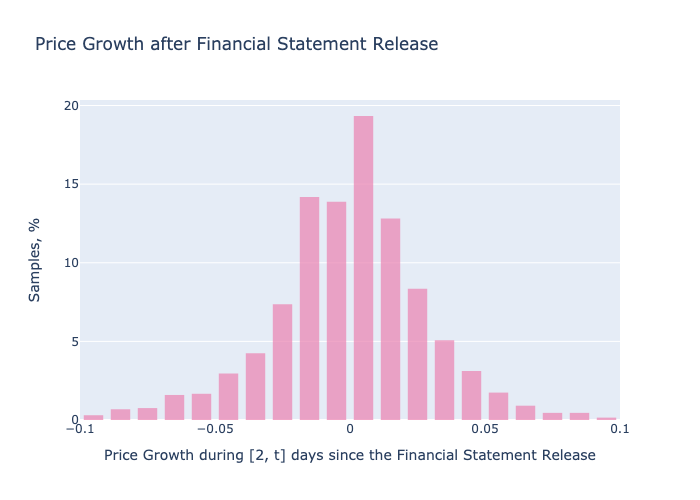

In [72]:
threshold = 0.01

#Extract samples for companies that published their reports
filing_released_samples = df_merged[(df_merged['filing_released'] == 1) & (df_merged['percent_growth'] >= threshold)]['price_growth_during_shift_days'].tolist()
display(df_merged[(df_merged['filing_released'] == 1) & (df_merged['percent_growth'] >= threshold)].head())

#Extract samples for companies that did not publish their reports
ordinary_day_samples = df_merged[(df_merged['filing_released'] == 0)]['price_growth_during_shift_days'].tolist()
display(df_merged[(df_merged['filing_released'] == 0)].head())

#Get basic statistics for both sets of samples
if len(ordinary_day_samples) == 0:
    t_score, p_value = (np.nan, np.nan)
else:
    t_score, p_value = ttest_ind(filing_released_samples, ordinary_day_samples, equal_var=False)

print(f"Shift = {shift}, Threshold = {threshold}")
print(f"Filing Released: mean={np.mean(filing_released_samples):.3f}, standard deviation={np.std(filing_released_samples):.3f}, number of samples={len(filing_released_samples)}")
print(f"Ordinary Day: mean={np.mean(ordinary_day_samples):.3f}, standard deviation={np.std(ordinary_day_samples):.3f}, number of samples={len(ordinary_day_samples)}")
print(f"P-value: {p_value:.3f}")
print("\n")

#Plot histograms of both sets of samples
print_histogram(filing_released_samples, ordinary_day_samples, "Price Growth after Financial Statement Release")

## 3. Results and Discussion 

Despite our efforts to thoroughly analyze the relationship between earnings reports and stock price movement, we were unable to obtain a valid P-value. This means that our analysis was unable to provide conclusive evidence of a correlation between these two variables. Although this outcome may be disappointing, it serves as a reminder of the complexities involved in stock market analysis and the many factors that can influence stock prices. Despite this setback, we remain committed to uncovering the underlying relationships that drive the financial markets and will continue to seek new and innovative ways to further our understanding of these complex and dynamic systems.

## 4. Conclusion 

In conclusion, our study aimed to investigate the correlation between earnings reports and stock price movements in the technology industry. Despite the use of high-quality data sources and a thorough data analysis process, our results were inconclusive and we were unable to obtain a valid P-value. This suggests that there may be other factors influencing stock prices and that more research is needed to fully understand the relationship between earnings reports and stock prices.